In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 26)

In [11]:
df["brand"] = df["CarName"].str.split(" ").str[0].str.lower()
df["brand"]

,brand
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


In [15]:
df["brand"] = df["brand"].replace({
    "maxda": "mazda",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"
})

In [17]:
df["brand"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
luxury_brands = ["bmw", "audi", "mercedes", "jaguar", "porsche"]

In [19]:
df = df.drop("car_ID", axis=1)

In [20]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  if col != "CarName":
    df[col] = le.fit_transform(df[col])

In [21]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [22]:
X = df.drop(["price", "CarName"], axis=1)
y = df["price"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=22),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=22)
}

In [27]:
results = []
for name, model in models.items():
  if "Regression" in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  results.append([name, mae, rmse, r2])
  print(f"{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Linear Regression → MAE: 1992.09, RMSE: 2603.75, R2: 0.85
Ridge Regression → MAE: 1982.39, RMSE: 2600.44, R2: 0.85
Lasso Regression → MAE: 1992.11, RMSE: 2603.78, R2: 0.85
Decision Tree → MAE: 1559.32, RMSE: 2135.54, R2: 0.90


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.281e+06, tolerance: 1.087e+06
  model = cd_fast.enet_coordinate_descent(


Random Forest → MAE: 1393.35, RMSE: 2068.17, R2: 0.91


In [28]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print("\nModel Comparison:\n", results_df)


Model Comparison:
                Model          MAE         RMSE        R2
0  Linear Regression  1992.086540  2603.747508  0.853405
1   Ridge Regression  1982.389495  2600.442205  0.853777
2   Lasso Regression  1992.108611  2603.777045  0.853401
3      Decision Tree  1559.317073  2135.544219  0.901386
4      Random Forest  1393.346279  2068.173390  0.907510


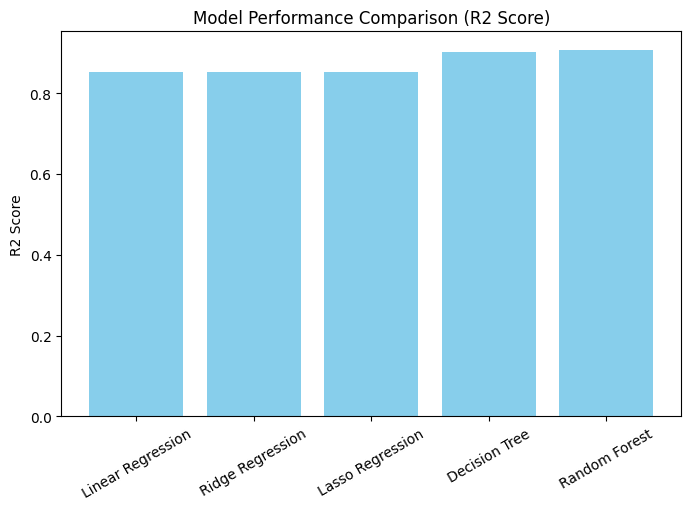

In [29]:
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["R2"], color="skyblue")
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison (R2 Score)")
plt.xticks(rotation=30)
plt.show()